# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
df = pd.read_csv('E:\FCAI\year 3\Term 2\Supervised Learning\Assignment 1\Iris.csv')

# Explore Data

In [3]:
column_names = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df.columns = column_names

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Scatter Plots

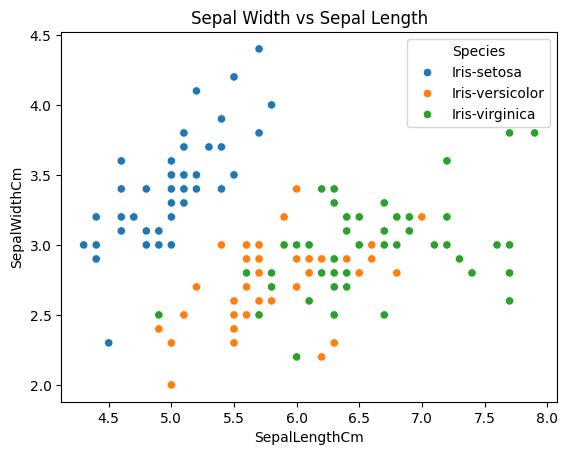

In [11]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.title('Sepal Width vs Sepal Length')
plt.show()

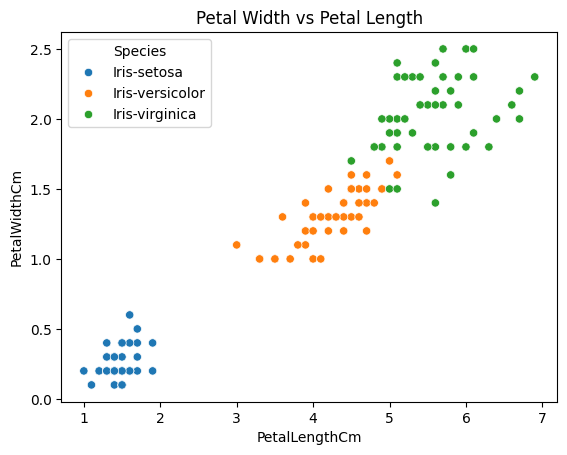

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')
plt.title('Petal Width vs Petal Length')
plt.show()

# Preprocessing

In [13]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [14]:
df.drop(columns='Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X = df.drop('Species', axis=1)
y = df.Species

# Splitting Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Model

In [17]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def cosine_similarity(x1, x2):
    return 1-(np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2)))

In [18]:
class KNN:

    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        if self.metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.metric == 'cosine':
            distances = [cosine_similarity(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError("Invalid metric. Use 'euclidean', 'manhattan', or 'cosine'.")
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [19]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [20]:
knn = KNN()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

1.0

In [21]:
knn = KNN(5,'manhattan')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

1.0

In [22]:
knn = KNN(metric='cosine')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.9666666666666667